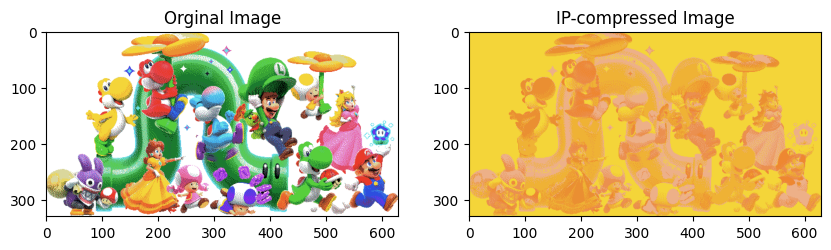

In [54]:
from PIL import Image
import re
import numpy as np
import matplotlib.pyplot as plt

unique_colors = np.load('./assets/unique_colors.npy')
centroids = np.load('./assets/centroids.npy')

with open('out.txt', 'r') as f:
    f = f.read()
    results = re.findall(r'(\d+,\d+)', f, re.DOTALL)
    if not len(results) == unique_colors.shape[0]:
        raise ValueError('Number of colors in the results is different from unique colors')

compression_lookup = {int(i[0]):int(i[1]) for i in [i.split(',') for i in results]} # original color : assigned centroid

img = Image.open('20col.png')
X = np.array(img)
h, w, c = X.shape
X = X.reshape(-1, c)

for i in range(unique_colors.shape[0]):
    idx = np.where(X == unique_colors[i])[0]
    X[idx] = centroids[compression_lookup[i+1]]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Orginal Image')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('IP-compressed Image')
plt.imshow(X.reshape(h, w, c))
plt.show()